# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Loading Data Set

In [3]:
data_set = pd.read_csv("data.csv")
data_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data_set['diagnosis'] = data_set['diagnosis'].replace({'M':1,'B':0})

# Basic Details of Data Set

In [5]:
data_set.shape 

(569, 33)

In [6]:
data_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data_set.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
data_set.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
data_set.duplicated().sum()

0

In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
data_set['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
data_set = data_set.drop(['id','Unnamed: 32'],axis=1)

In [13]:
data_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
data_set.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Splitting The Dataset

In [15]:
y = data_set['diagnosis']


In [16]:
X = data_set.drop('diagnosis',axis=1)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,15.49,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182


In [20]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,18.790,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,12.360,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.01553,0.1718,0.05780,...,12.570,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576
429,12.720,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.01835,0.1459,0.05544,...,13.820,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025
399,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.01638,0.1847,0.06019,...,13.450,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121
323,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.15040,0.2569,0.06670,...,25.300,31.86,171.10,1938.0,0.1592,0.44920,0.53440,0.26850,0.5558,0.10240


In [21]:
y_train

567    1
295    0
91     1
1      1
94     1
      ..
369    1
320    0
527    0
125    0
265    1
Name: diagnosis, Length: 455, dtype: int64

In [22]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400,1
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794,0
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,1
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574,1
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702,0
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,0
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182,0


In [23]:
train_set.shape

(455, 31)

In [24]:
test_set = pd.concat([X_test,y_test],axis=1)
test_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.10970,0.1966,0.07069,...,17.04,125.00,1102.0,0.1531,0.35830,0.58300,0.18270,0.3216,0.10100,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393,0
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.025560,0.02031,0.1872,0.05669,...,20.21,99.16,670.6,0.1105,0.20960,0.13460,0.06987,0.3323,0.07701,0
370,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,0.2175,0.06218,...,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614,1
419,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.01076,0.1615,0.06144,...,28.92,79.26,458.0,0.1282,0.11080,0.03582,0.04306,0.2976,0.07123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576,0
429,12.720,17.67,80.98,501.3,0.07896,0.04522,0.014020,0.01835,0.1459,0.05544,...,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025,0
399,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,0
323,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.15040,0.2569,0.06670,...,31.86,171.10,1938.0,0.1592,0.44920,0.53440,0.26850,0.5558,0.10240,1


In [25]:
test_set.shape

(114, 31)

In [26]:
X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.336934,0.997946,0.987038,0.155727,0.521559,0.719517,0.830257,0.136889,-0.317144,...,0.969398,0.295950,0.964153,0.943283,0.090981,0.439461,0.569775,0.756042,0.152335,0.022305
texture_mean,0.336934,1.000000,0.342687,0.334507,-0.036416,0.249385,0.339384,0.309993,0.073354,-0.082661,...,0.372165,0.909002,0.377564,0.365058,0.062628,0.297932,0.337717,0.315571,0.109658,0.138726
perimeter_mean,0.997946,0.342687,1.000000,0.986395,0.190818,0.570740,0.757186,0.857494,0.169713,-0.267941,...,0.969575,0.302246,0.969709,0.944364,0.121637,0.480757,0.605480,0.781962,0.173339,0.066113
area_mean,0.987038,0.334507,0.986395,1.000000,0.164818,0.513240,0.724681,0.830007,0.139669,-0.288859,...,0.960865,0.287614,0.956812,0.959682,0.097993,0.413809,0.548673,0.731099,0.129682,0.016408
smoothness_mean,0.155727,-0.036416,0.190818,0.164818,1.000000,0.636728,0.497682,0.530420,0.550589,0.578380,...,0.193025,0.009373,0.219139,0.190693,0.791682,0.446820,0.406251,0.467957,0.354689,0.477206
compactness_mean,0.521559,0.249385,0.570740,0.513240,0.636728,1.000000,0.892612,0.836370,0.573931,0.549106,...,0.553408,0.247531,0.608271,0.530966,0.541051,0.865225,0.823111,0.816454,0.468825,0.686387
concavity_mean,0.719517,0.339384,0.757186,0.724681,0.497682,0.892612,1.000000,0.938155,0.457960,0.278521,...,0.727656,0.322490,0.769943,0.714776,0.429289,0.770983,0.883312,0.875083,0.360946,0.497214
concave points_mean,0.830257,0.309993,0.857494,0.830007,0.530420,0.836370,0.938155,1.000000,0.436838,0.145656,...,0.835008,0.292355,0.860268,0.816599,0.425980,0.680928,0.770253,0.910389,0.337298,0.367950
symmetry_mean,0.136889,0.073354,0.169713,0.139669,0.550589,0.573931,0.457960,0.436838,1.000000,0.451516,...,0.176332,0.075621,0.209650,0.169420,0.408684,0.438258,0.388258,0.391040,0.666327,0.397835
fractal_dimension_mean,-0.317144,-0.082661,-0.267941,-0.288859,0.578380,0.549106,0.278521,0.145656,0.451516,1.000000,...,-0.258557,-0.058531,-0.207923,-0.236055,0.506969,0.434178,0.289952,0.147237,0.301872,0.756037


# PLOTS 


<Axes: >

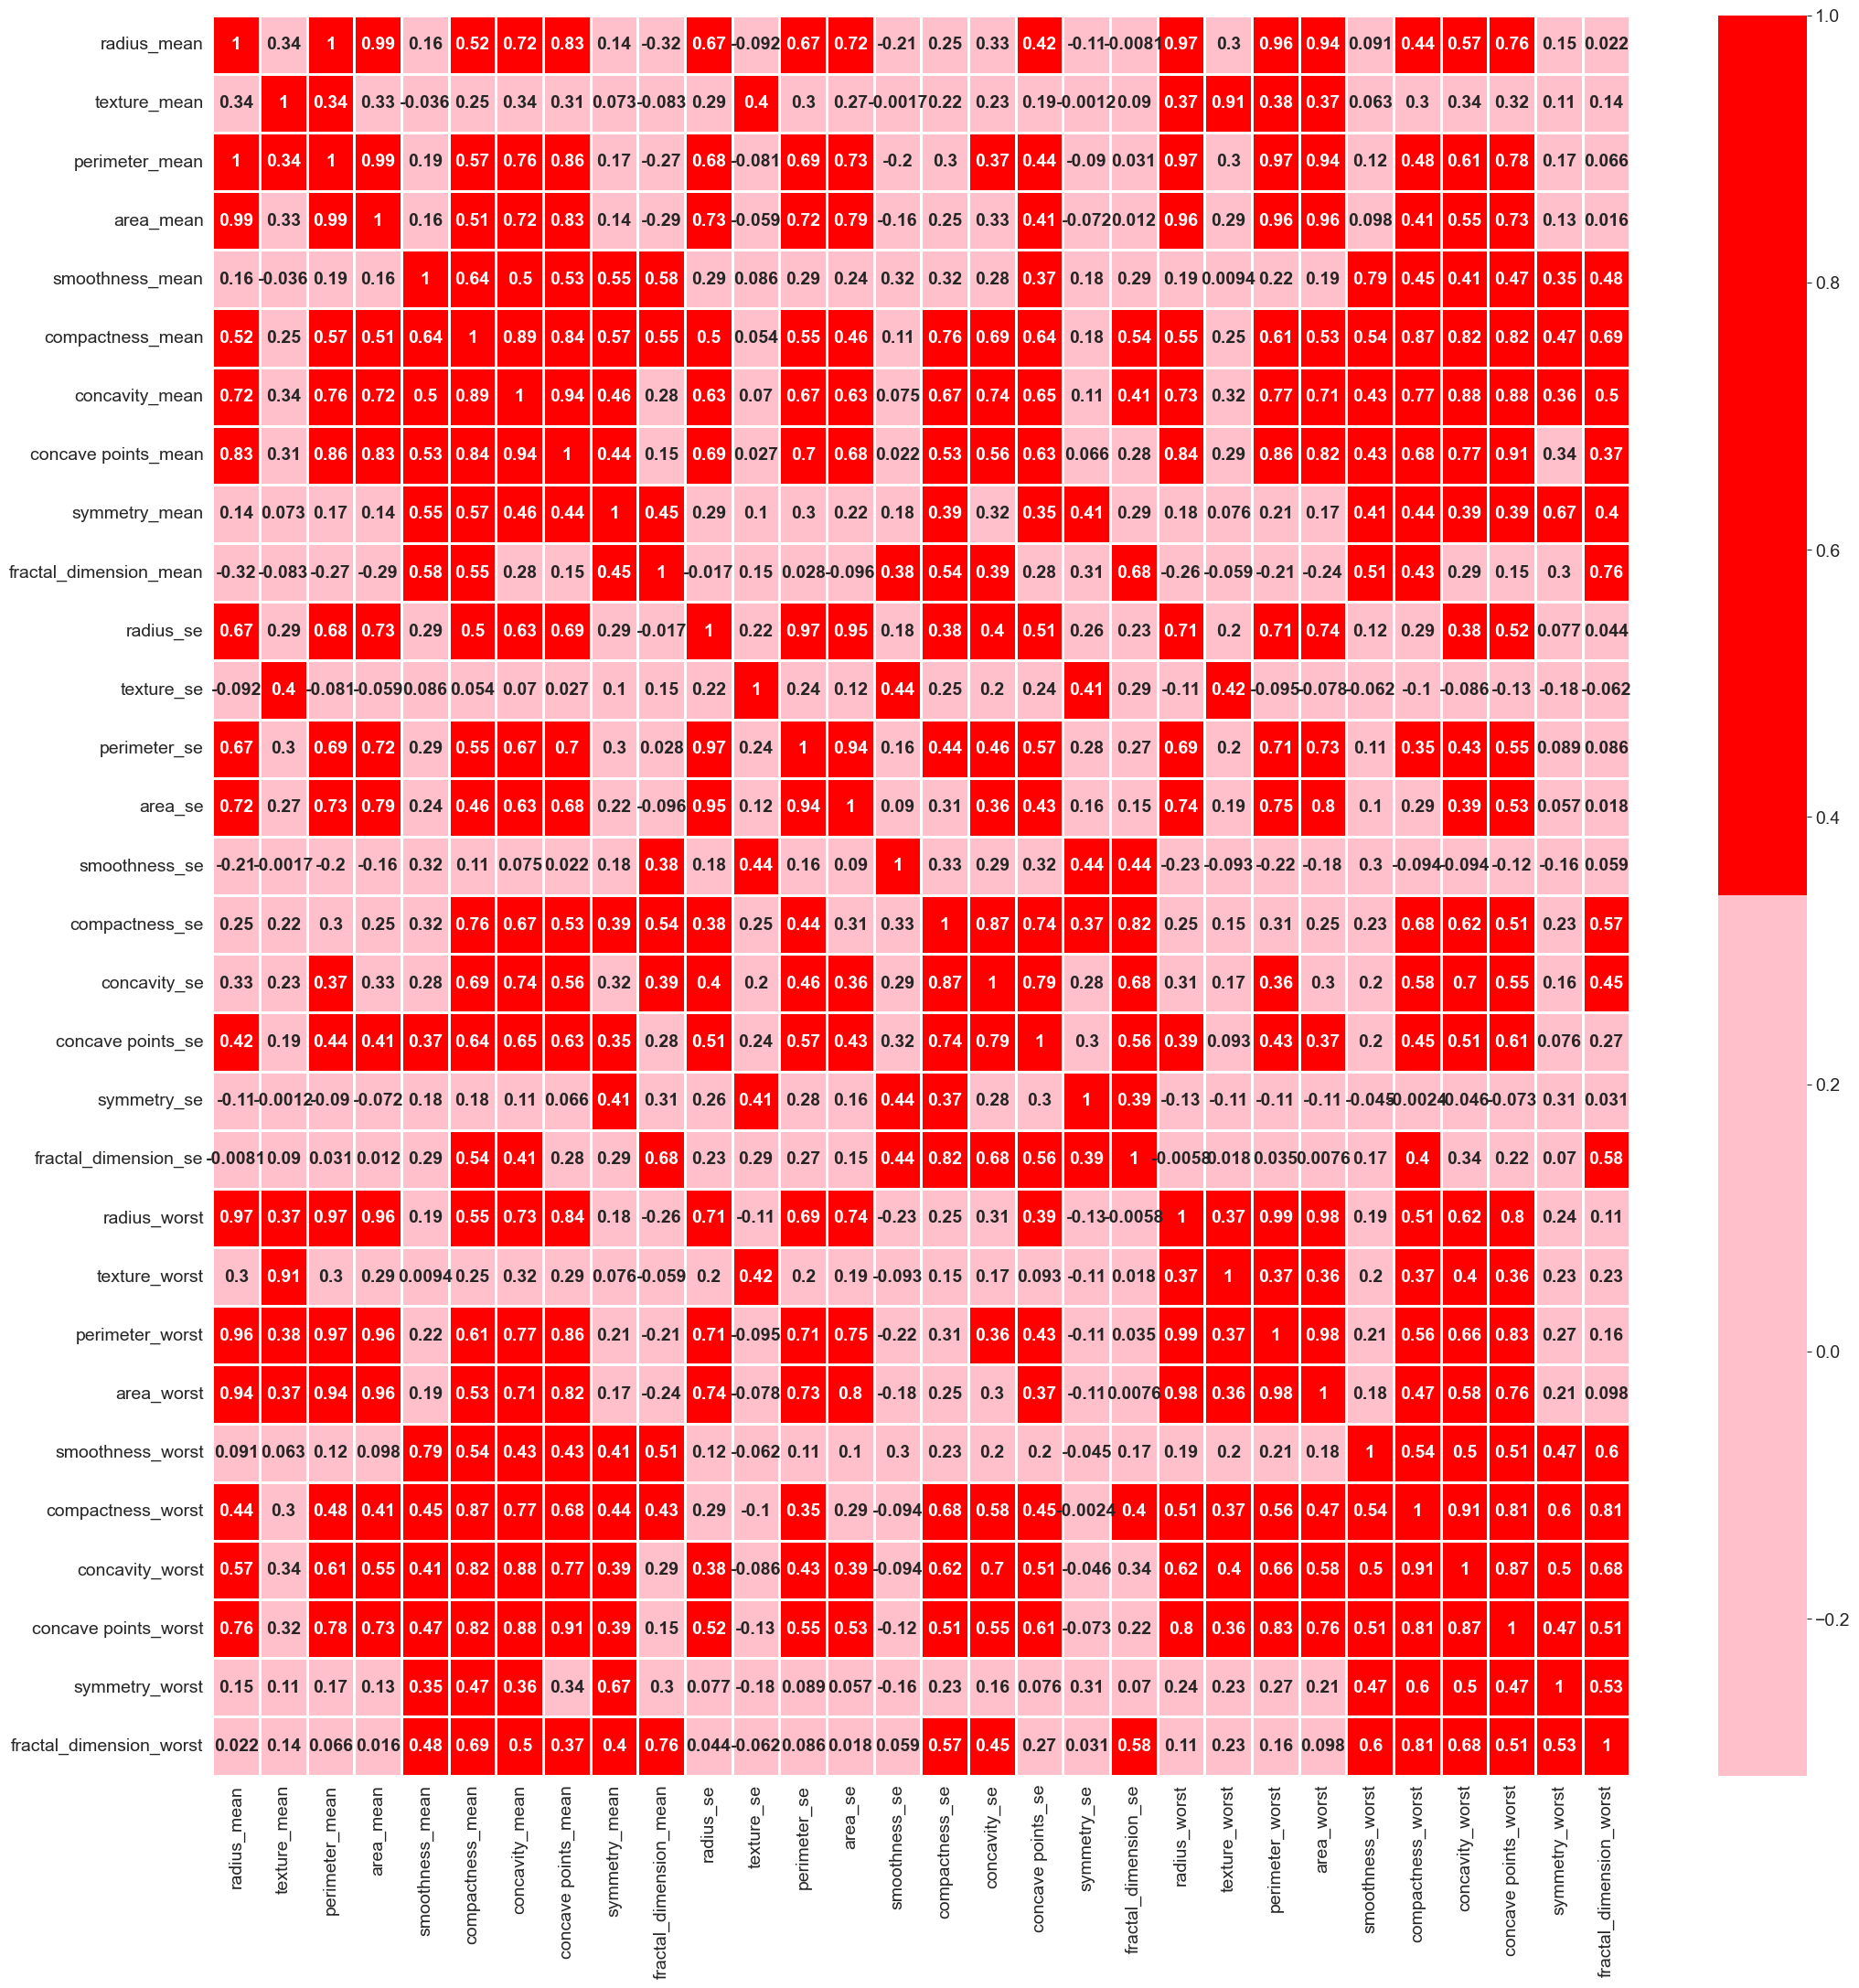

In [27]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(25, 25))
custom_cmap = ListedColormap(['pink','red'])
sns.heatmap(X_train.corr(),cmap=custom_cmap, linewidths=2, linecolor='white', annot=True,annot_kws={"weight": "bold"})

<Axes: xlabel='diagnosis', ylabel='count'>

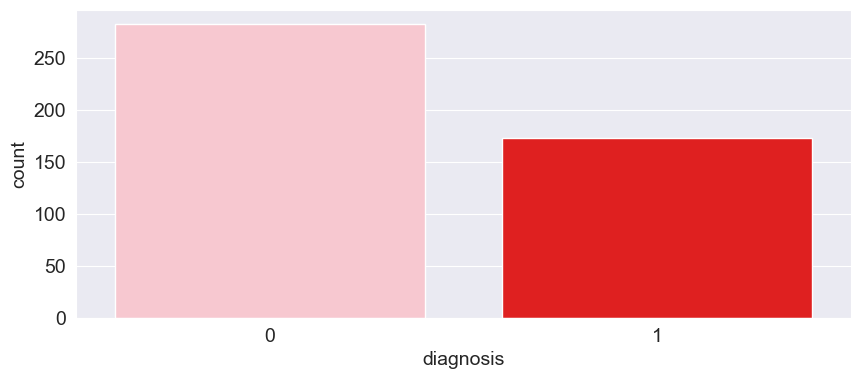

In [28]:
palette_colors = ['pink', 'red']
plt.ylabel('Frequency')
sns.countplot(x='diagnosis', data=train_set,palette=palette_colors)

In [29]:
#sns.pairplot(data=train_set, diag_kind='kde')

In [30]:
''' px.histogram(train_set,
            x ='Glucose',
            title = 'Glucose vs Classification',
            color = 'Classification',
            color_discrete_map={1: 'pink', 2: 'red'}
            )'''

" px.histogram(train_set,\n            x ='Glucose',\n            title = 'Glucose vs Classification',\n            color = 'Classification',\n            color_discrete_map={1: 'pink', 2: 'red'}\n            )"

In [31]:
'''px.histogram(train_set,
            x ='Insulin',
            title = 'Insulin vs Classification',
            color = 'Classification',
            color_discrete_map={1: 'pink', 2: 'red'}
            )'''

"px.histogram(train_set,\n            x ='Insulin',\n            title = 'Insulin vs Classification',\n            color = 'Classification',\n            color_discrete_map={1: 'pink', 2: 'red'}\n            )"

In [32]:
'''px.scatter(train_set.sample(1000),
         title = 'Insulin vs Glucose',
         x ='Insulin',
         y ='Glucose',
         color = 'Classification',
         color_discrete_sequence=['pink','red'],
         trendline='ols')'''

"px.scatter(train_set.sample(1000),\n         title = 'Insulin vs Glucose',\n         x ='Insulin',\n         y ='Glucose',\n         color = 'Classification',\n         color_discrete_sequence=['pink','red'],\n         trendline='ols')"

In [33]:
#sns.pairplot(data=train_set, diag_kind='kde')

# Tree based method feature importance 


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
dt = DecisionTreeClassifier(random_state=10)

In [36]:
dt.fit(X_train,y_train)
y_pred_dt  = dt.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred_dt)

0.8596491228070176

In [38]:
importances = dt.feature_importances_

In [39]:
feature_importance_df = pd.DataFrame(importances,index=X_train.columns,columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                         Importance
perimeter_worst            0.719728
concave points_worst       0.118433
texture_mean               0.054271
texture_worst              0.030900
area_mean                  0.025360
fractal_dimension_se       0.012175
symmetry_mean              0.008535
symmetry_se                0.007803
texture_se                 0.006995
radius_mean                0.006218
concave points_mean        0.004663
radius_se                  0.002862
perimeter_se               0.002057
area_worst                 0.000000
compactness_worst          0.000000
concavity_worst            0.000000
symmetry_worst             0.000000
radius_worst               0.000000
smoothness_worst           0.000000
compactness_se             0.000000
concave points_se          0.000000
concavity_se               0.000000
smoothness_se              0.000000
area_se                    0.000000
fractal_dimension_mean     0.000000
concavity_mean             0.000000
compactn

In [40]:
cumulative_importance = np.cumsum(feature_importance_df['Importance'].values)
cumulative_importance

array([0.71972834, 0.83816101, 0.89243216, 0.92333212, 0.94869187,
       0.9608672 , 0.96940207, 0.97720459, 0.98419942, 0.99041705,
       0.99508028, 0.9979427 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

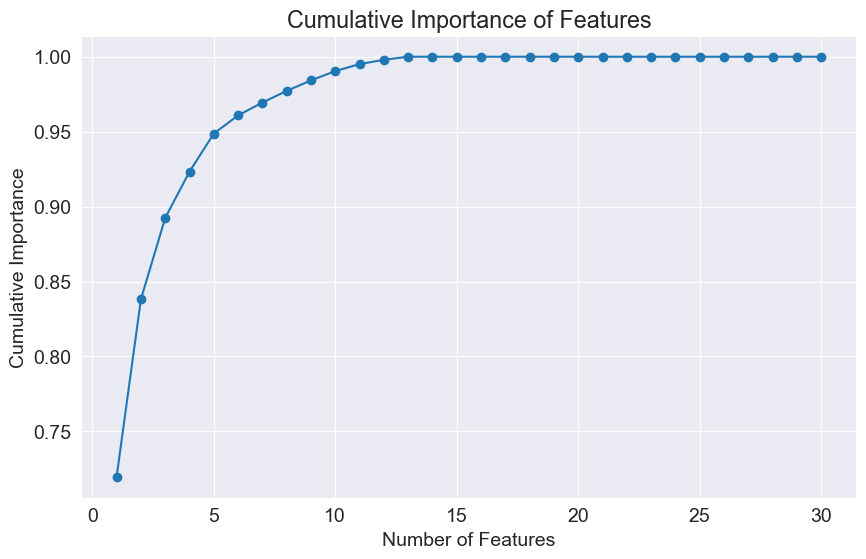

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()


In [42]:
optimal_num_features = np.argmax(cumulative_importance >= 0.95) + 1
print("Optimal number of features:", optimal_num_features)

Optimal number of features: 6


In [43]:
important_features = feature_importance_df.head(6).index.tolist()

In [44]:
X_train_selected = X_train[important_features]
y_train_selected = y_train

In [45]:
y_train_equal = y_train.equals(y_train_selected)
print(y_train_equal)

True


In [46]:
X_train_selected

,perimeter_worst,concave points_worst,texture_mean,texture_worst,area_mean,fractal_dimension_se
567,184.60,0.26500,29.33,39.42,1265.0,0.006185
295,94.17,0.05802,13.27,16.93,582.7,0.001802
91,107.50,0.14760,22.76,25.84,728.2,0.002142
1,158.80,0.18600,17.77,23.41,1326.0,0.003532
94,123.50,0.21150,19.83,24.23,705.6,0.003520
...,...,...,...,...,...,...
369,195.00,0.24320,21.90,25.80,1482.0,0.003796
320,71.53,0.09744,16.18,20.61,324.2,0.007596
527,87.22,0.10700,12.27,19.27,468.5,0.001366
125,100.30,0.05104,17.21,23.58,588.7,0.001708


In [47]:
y_train_selected

567    1
295    0
91     1
1      1
94     1
      ..
369    1
320    0
527    0
125    0
265    1
Name: diagnosis, Length: 455, dtype: int64

<Axes: >

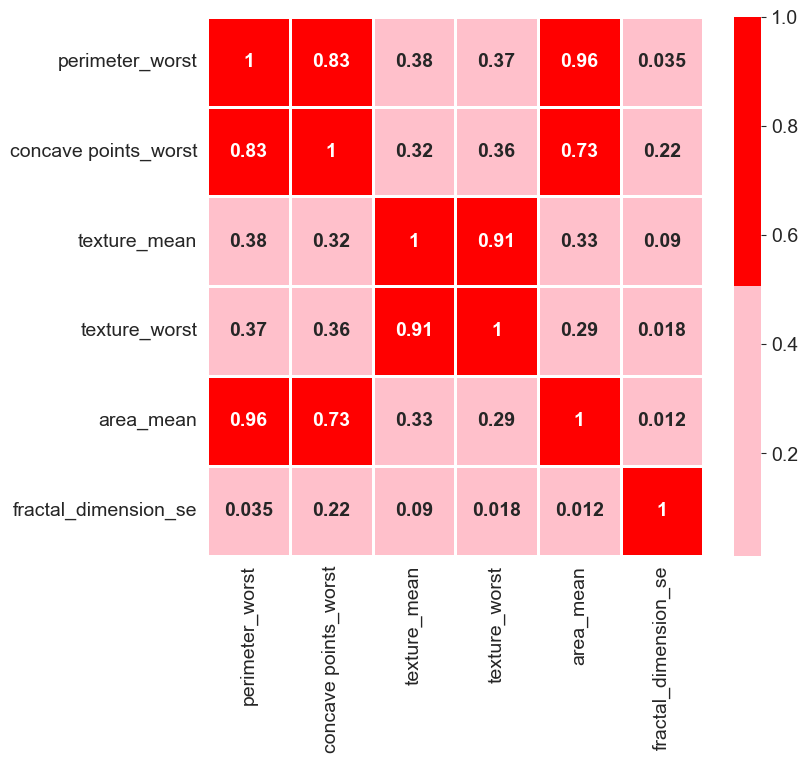

In [48]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,7))
custom_cmap = ListedColormap(['pink','red'])
sns.heatmap(X_train_selected.corr(),cmap=custom_cmap, linewidths=2, linecolor='white', annot=True,annot_kws={"weight": "bold"})

In [49]:
counter_imp = Counter(y_train)
counter_imp

Counter({1: 173, 0: 282})

In [50]:
X_test.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [51]:
X_test.drop(['symmetry_mean','symmetry_se','texture_se','radius_mean','concave points_mean','radius_se','perimeter_se','area_worst','compactness_worst','concavity_worst','symmetry_worst','radius_worst','smoothness_worst','compactness_se','concave points_se','concavity_se','smoothness_se','area_se','fractal_dimension_mean','concavity_mean','compactness_mean','smoothness_mean','perimeter_mean','fractal_dimension_worst'],axis=1,inplace=True)

In [52]:
X_test.columns

Index(['texture_mean', 'area_mean', 'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'concave points_worst'],
      dtype='object')

In [53]:
X_train_selected.columns

Index(['perimeter_worst', 'concave points_worst', 'texture_mean',
       'texture_worst', 'area_mean', 'fractal_dimension_se'],
      dtype='object')

In [54]:
selected_columns = X_train_selected.columns
X_test = X_test[selected_columns]

In [55]:
X_train_selected.columns

Index(['perimeter_worst', 'concave points_worst', 'texture_mean',
       'texture_worst', 'area_mean', 'fractal_dimension_se'],
      dtype='object')

In [56]:
X_test.columns 

Index(['perimeter_worst', 'concave points_worst', 'texture_mean',
       'texture_worst', 'area_mean', 'fractal_dimension_se'],
      dtype='object')

In [57]:
X_test

,perimeter_worst,concave points_worst,texture_mean,texture_worst,area_mean,fractal_dimension_se
172,125.00,0.18270,11.89,17.04,736.9,0.004168
553,62.86,0.02564,21.94,25.05,264.0,0.004623
374,99.16,0.06987,16.07,20.21,579.1,0.002177
370,129.30,0.22480,23.29,31.03,840.4,0.004085
419,79.26,0.04306,21.41,28.92,380.3,0.002060
...,...,...,...,...,...,...
188,79.57,0.04306,17.39,26.48,428.9,0.001988
429,88.87,0.03612,17.67,20.96,501.3,0.001180
399,86.00,0.05356,17.26,24.49,431.9,0.003071
323,171.10,0.26850,21.51,31.86,1264.0,0.003345


# K-Mean Cluster method to observe Clusters 



In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(X_train_selected)
    wcss.append(kmeans.inertia_)

E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

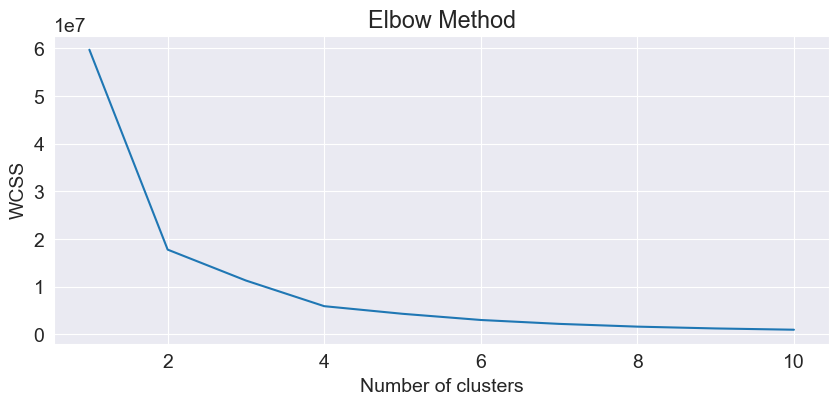

In [59]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [60]:
kmeans2 = KMeans(n_clusters=2, random_state=10, n_init=25, algorithm='lloyd')
kmeans2.fit(X_train_selected)

# output
zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [1.61616327e+02 1.95332653e-01 2.19556122e+01 2.87775510e+01
 1.24311020e+03 4.18091837e-03] 
 Cluster 1 : [9.38337255e+01 9.53526639e-02 1.84715126e+01 2.46915126e+01
 5.07733333e+02 3.67989720e-03] 
 
 Clustering vector: 
 [0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 

E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [61]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


E:\applications\Anaconda\files\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


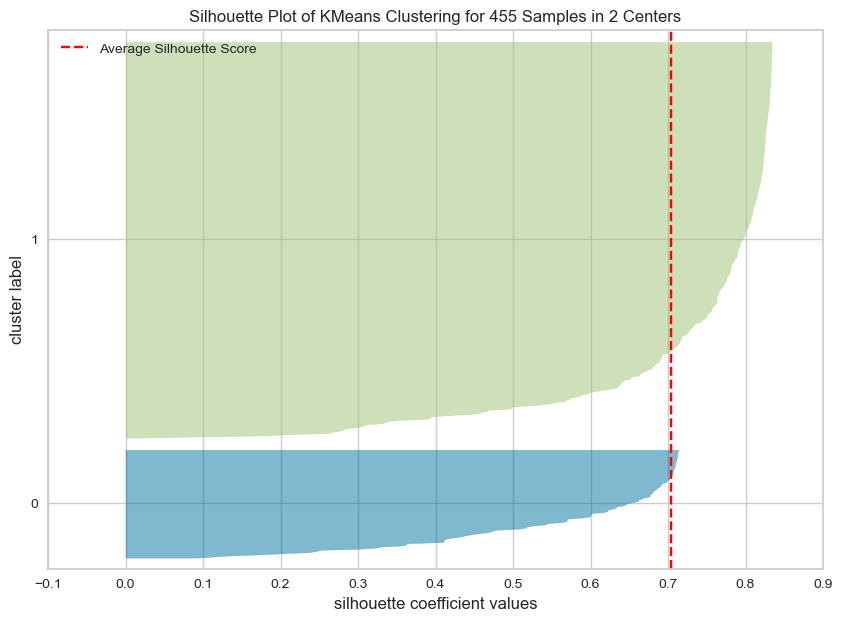

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 455 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=25, random_state=10))

In [62]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans2, X_train_selected, colors='yellowbrick')

# Scaling Data

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_selected)
X_test_sc = sc.transform(X_test)

# Logistic Regression Model 

In [66]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(penalty='l2',solver='liblinear',random_state = 10,multi_class='ovr')
logi_model.fit(X_train_selected,y_train)


LogisticRegression(multi_class='ovr', random_state=10, solver='liblinear')

In [67]:
print(logi_model.coef_.tolist())

[[0.012675970252347929, 1.9881222138691823, -0.2572754970028255, 0.2217777400471512, 0.006634584160782029, 0.011358307568361788]]


In [68]:
print(logi_model.intercept_)

[-7.0632888]


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [70]:
#y_pred_train = logi_model.predict(X_train_selected)

In [71]:
#accuracy_tr = accuracy_score(y_train, y_pred_train,normalize=True)
#print("Accuracy_tr:", accuracy_tr)

Accuracy_tr: 0.9098901098901099


In [72]:
y_pred_test = logi_model.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred_test,normalize=True)
print("Accuracy:", accuracy)

Accuracy: 0.9035087719298246


In [74]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[72  3]
 [ 8 31]]


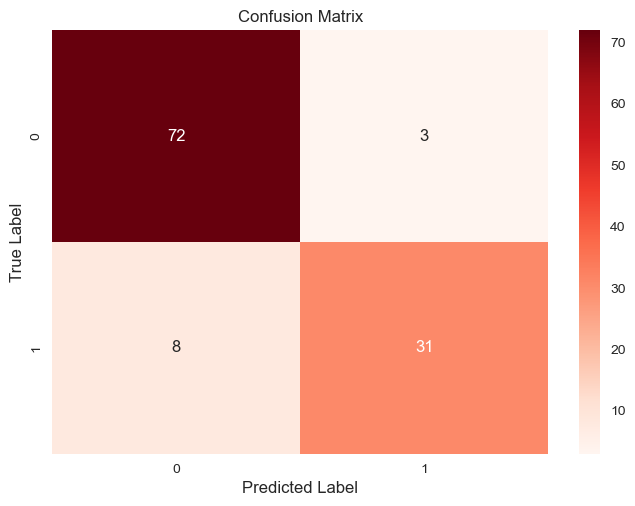

In [75]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        75
           1       0.91      0.79      0.85        39

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



# KNN Model 

In [77]:
knn_model = KNeighborsClassifier()

In [78]:
knn_model.fit(X_train_selected, y_train)

KNeighborsClassifier()

In [79]:
y_pred_knn = knn_model.predict(X_test)

In [80]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9035087719298246

In [81]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

Confusion Matrix:
[[72  3]
 [ 8 31]]


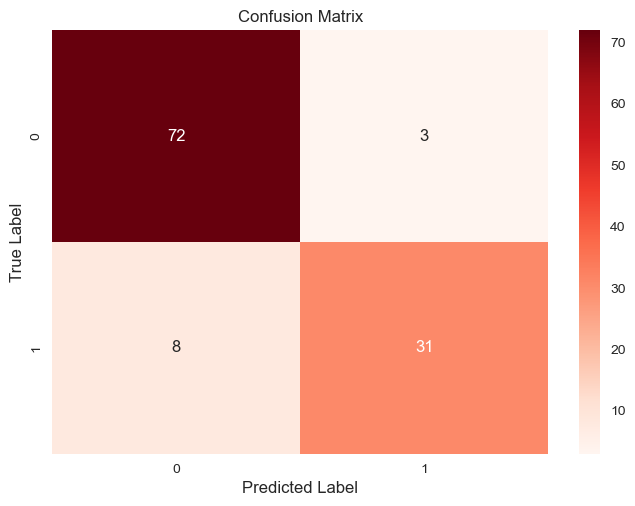

In [82]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [83]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        75
           1       0.91      0.79      0.85        39

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



# Random Forest Model 

In [84]:
random_forest_model = RandomForestClassifier(random_state=10)

In [85]:
random_forest_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=10)

In [86]:
y_pred_rf = random_forest_model.predict(X_test)

In [87]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9736842105263158

In [88]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[73  2]
 [ 1 38]]


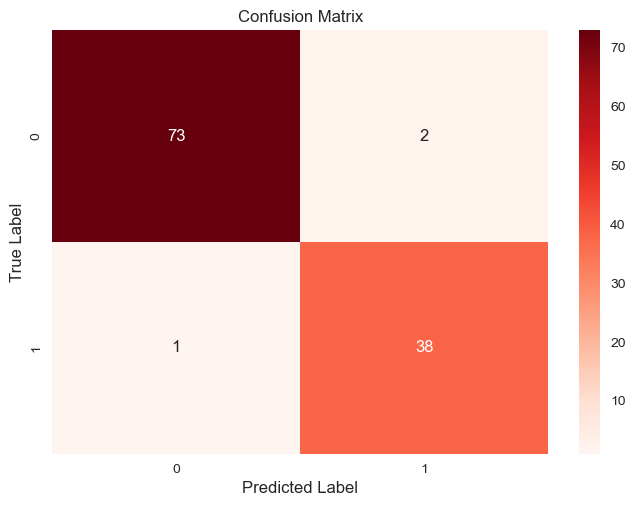

In [89]:
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [90]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# XG Boost Model 

In [107]:
xgb_model = xgb.XGBClassifier(random_state=10)

In [108]:
xgb_model.fit(X_train_selected, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [109]:
y_pred_xgb = xgb_model.predict(X_test)

In [110]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9736842105263158

In [111]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

Confusion Matrix:
[[73  2]
 [ 1 38]]


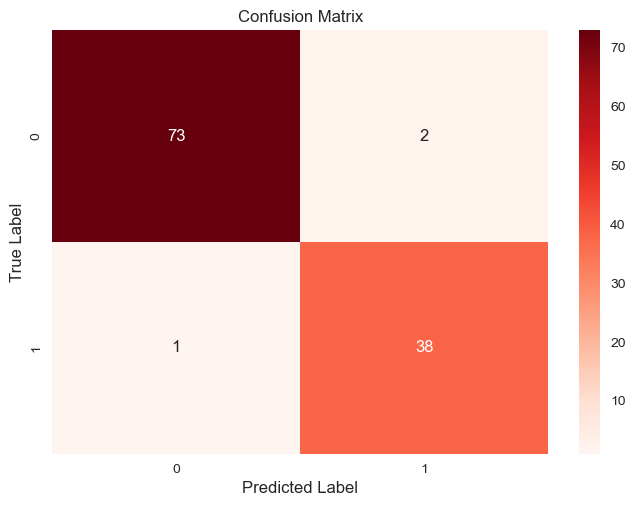

In [112]:
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [113]:
result = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression', 'KNN', 'XGBoostClassifier'],
    'Score': [accuracy_rf, accuracy, accuracy_knn, accuracy_xgb]
})

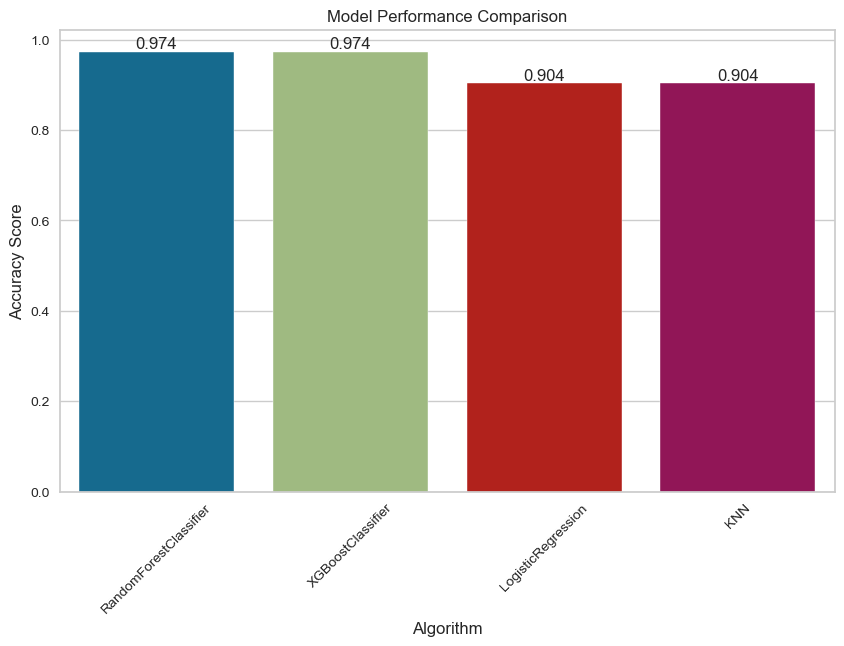

In [114]:
result.sort_values(by='Score', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=45)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.show()

In [115]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

